### SVM(Support Vector Machines)

$$머신러닝의 분류체계도$$

<img src="./images/28.머신러닝_지도학습_3_SVM_01.png" width="500" height="400">


`서포트벡터머신`은 분류문제에 사용할 수 있는 강력한 머신러닝 지도학습 모델이다. `SVM`은 `결정경계(Decision Boundary)` 즉 분류를 위한 기준선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어는 쪽에 속하는지 확인해서 분류문제를 수행할 수 있게 된다.

<img src="./images/28.머신러닝_지도학습_3_SVM_02.png" width="500" height="400">
<img src="./images/28.머신러닝_지도학습_3_SVM_03.png" width="500" height="400">

###### 1. 개요

* Boser, Guyon 및 Vapnik에 의해 1992년에 제안된 이후, 1990년대 후반부터 현재까지 학계와 업계(주로 미국 및 유럽선진국)에서 활발하게 활용되고 있는 예측기법
* 기계학습의 분야 중 하나로 패턴인식, 자료분석을 위한 지도학습 모델
* 주로 분류와 회귀분석을 위해 사용
* 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어 졌을 때 새로운 데이터가 어느 카테고리에 속할지 판단하는 기준으로 가장 큰 폭을 가진 경계를 찾는 알고리즘

###### 2. 장점

* 선형분류뿐만 아니라 비선형분류도 가능
* 모델을 만들 때 고려해야할 파라미터가 많지 않음
* 적은 양의 데이터로도 모델을 만들 수 있다.
* 딥러닝 이전에는 분류모델중에서 기술적으로 가장 진보된 모델로 평가

###### 3. 적용분야

* 문서분류
* 안면인식, 주차인식
* 주가예측
* 부도예측
* 고객구매예측
* 채권등급평가예측


In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

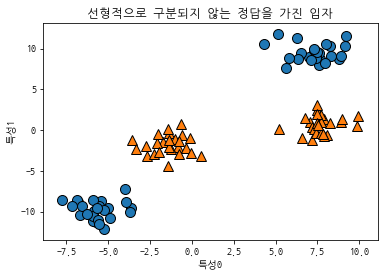

In [6]:
# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋
# make_bolbs 데이터셋을 이용
import mglearn
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2 # label을 0과 1로 설정

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.title("선형적으로 구분되지 않는 정답을 가진 이진분류(0과1) 데이터셋")
plt.show()

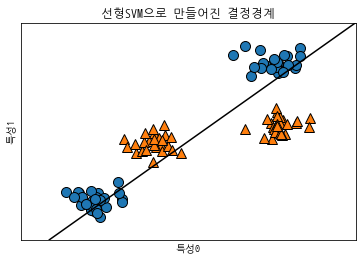

In [7]:
from sklearn.svm import LinearSVC

liner_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(liner_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.title("선형SVM으로 만들어진 결정경계")
plt.show()

# 결과분석
# 분류를 위한 선형모델은 직선으로만 데이터포인트를 나눌 수 있어서
# 예시로 제시된 데이터들과는 잘 맞지가 않는다. 즉 예측을 할 수 없다.

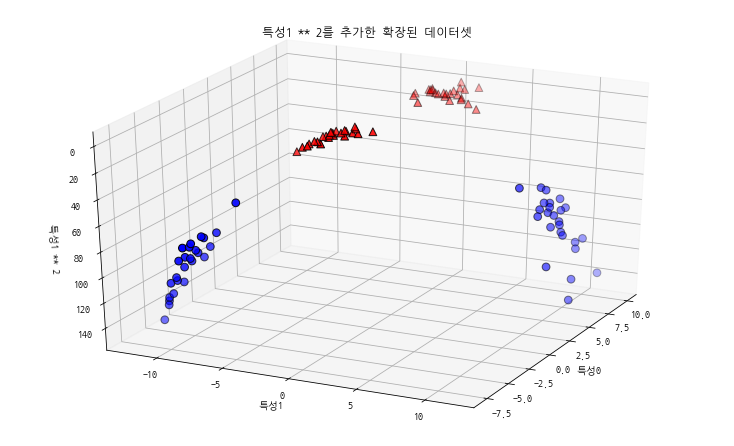

In [9]:
# 두번째 특성에다 제곱을 한 "특성1**2" 값을 새로운 특성으로 추가해서 입력특성을
# 2차원데이터가 아니라 특성0, 특성1, 특성1**2의 3차원 데이터로 차원확장을 한 후에
# 산점도로 표현
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(figsize=(10,6))

# 두 번째 특성을 제곱하여 새로운 특성을 추가
X_new = np.hstack([X, X[:,1:]**2])
# X_new

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
# mask
# y == 0인 포인트 먼저 그리고 그 다음에 y == 1인 포인트를 그리기
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
ax.set_title("특성1 ** 2를 추가한 확장된 데이터셋")
plt.show()

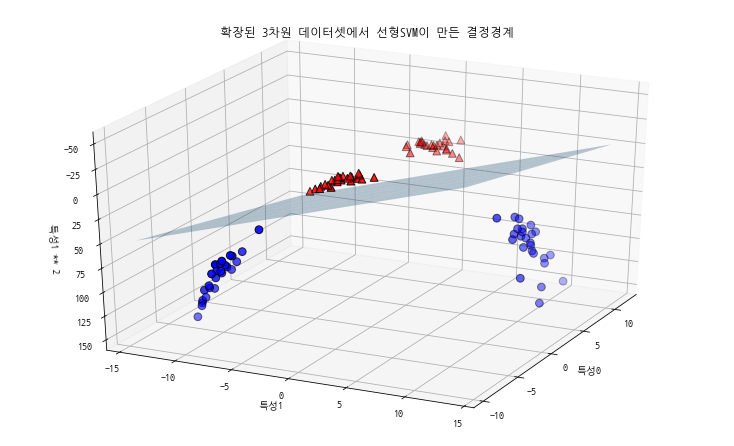

In [15]:
# 새로운 데이터셋(X_new)에서는 선형모델과 3차원 공간의 평면을 이용해서
# 데이터셋을 분류하기
liner_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = liner_svm_3d.coef_.ravel(), liner_svm_3d.intercept_

# 경계그리기
figure = plt.figure(figsize=(10,6))
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] # 제곱한 특성만큼 원상으로 복귀

# 데이터셋 그리기
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
# 초평면그리기
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
ax.set_title("확장된 3차원 데이터셋에서 선형SVM이 만든 결정경계")
plt.show()

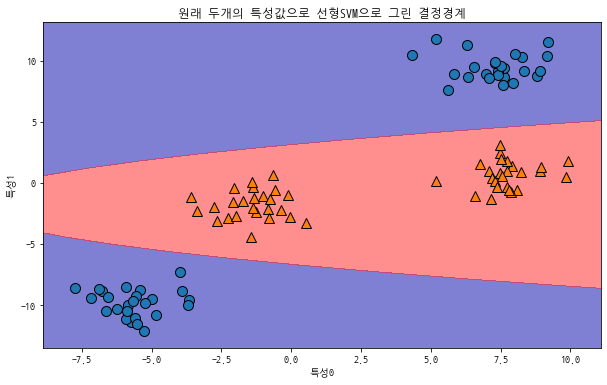

In [17]:
# 원래 특성을 살펴보면 상기의 셀에서의 선형SVM모델은 더 이상 선형이 아니다.
# 직선보다는 타원에 가까운 형태의 비선형모델이다. 따라서 비선형의 모습을 그리기
figure = plt.figure(figsize=(10,6))

ZZ = YY ** 2
dec = liner_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

mglearn.discrete_scatter(X[:,0], X[:,1], y)

# contourf : 윤곽
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)

plt.xlabel("특성0")
plt.ylabel("특성1")
plt.title("원래 두개의 특성값으로 선형SVM으로 그린 결정경계")
plt.show()

#### 커널기법

* 참고사이트 : https://bskyvision.com/163

데이터셋에 비선형특성을 추가하여 선형모델을 강력하게 만들었지만 대다수의 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 추가할 수록 연산비용이 커진다. 이런 것은 수학적인 기법을 사용해서 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수가 있다.

이런 수학적인 방법을 `커널기법 Kernel trick`라고 하며 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(더 정확히는 스칼라곱)를 계산한다.

SVM에서는 데이터를 고차원공간에 매핑하는 데 많이 사용하는 방법은 2가지이다.

1. 다항식커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산하는 방법(예를들어 특성1**2, 특성2**5)
2. `가우시안 Gaussian`커널로 불리는 `RBF Radial Basis Function`커널 : 가우시안커널은 차원이 무한한 특성공간에 매핑하는 것으로 모든 차수의 모든 다항식을 고려한다. 하지만 특성의 중요도는 고차원이 될 수록 줄어든다.

#### SVM이해하기

일반적으로 훈련데이터의 일부만 결정경계를 만드는 데 영향을 준다. 바로 두 클래스사이의 경계에 위치한 데이터포이트를 `서포트벡터 Support Vector`라고 한다.

새로운 데이터포인트에 대해 예측하려면 각 서포트벡터의 거리를 측정하는데 분류결정은 `서포트벡터까지의 거리`에 기반하며 서포트 벡터의 중요도는 훈련과정에서 학습한다. 이 값은 `SVC객체의 dual_coef_`속성에 저장된다. 데이터포인트 사이의 거리는 `가우시안커널`에 의해 계산된다.

$$K_{rbf}(x1,x2) = exp(-\gamma\|x1 - x2\|^2)$$

여기에서 $x1$과 $x2$는 데이터포인터이며 $\|x1 - x2\|$는 유클리디안 거리이고 $\gamma$는 가우시안 커널의 폭을 제어하는 매개변수이다.

* 유클리디안 거리 : https://needjarvis.tistory.com/454

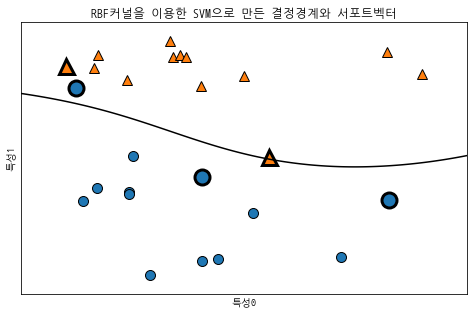

In [18]:
# SVM실습
# make_handcrafted_dataset 이터셋으로 SVM학습시키기
from sklearn.svm import SVC
figure = plt.figure(figsize=(8,5))
X, y = mglearn.tools.make_handcrafted_dataset()

# 데이터포인트 그리기 (산점도)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# 기계학습
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

# 서포트벡터구하기
sv = svm.support_vectors_
# dual_coef_의 값(부호)에 의해 서포트벡터의 클래스레이블(정답 또는 분류)이 결정된다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel("특성0")
plt.ylabel("특성1")
plt.title("RBF커널을 이용한 SVM으로 만든 결정경계와 서포트벡터")
plt.show()

# 결과분석
# 2개의 클래스의 2차원 데이터셋에 서포트벡터머신을 학습시킨 결과로 결정경계는 검은실선,
# 서포트벡터는 굵은 테두리의 포인터이다.
# 아래 그래프의 결과는 SVM에서는 직선이 아니라 부드럽고 비선형(직선이 아닌)경계를 만듬

#### SVM 매개변수 튜닝

* SVC의 C=10변수와 gamma=0.1변수
 - gmma변수 : $\gamma$값으로 가우시안커널폭의 역수를 의미한다. gamma매개변수가 하나의 훈련샘플에 미치는 영향의 범위를 결정한다. 작은 값은 넓은 영역, 큰 값은 좁은 영역을 의미한다. 큰 값일 경우라면 영향이 미치는 범위가 제한적이다. 즉, 가우시안커널의 반경이 클수록 훈련샘플의 영향도 커진다.
 - C변수 : 선형모델에서 사용한 것과 비슷한 규제 매개변수이다. 이 변수는 각 포인트의 중요도(정확히는 dual_coef_값)를 제한한다.

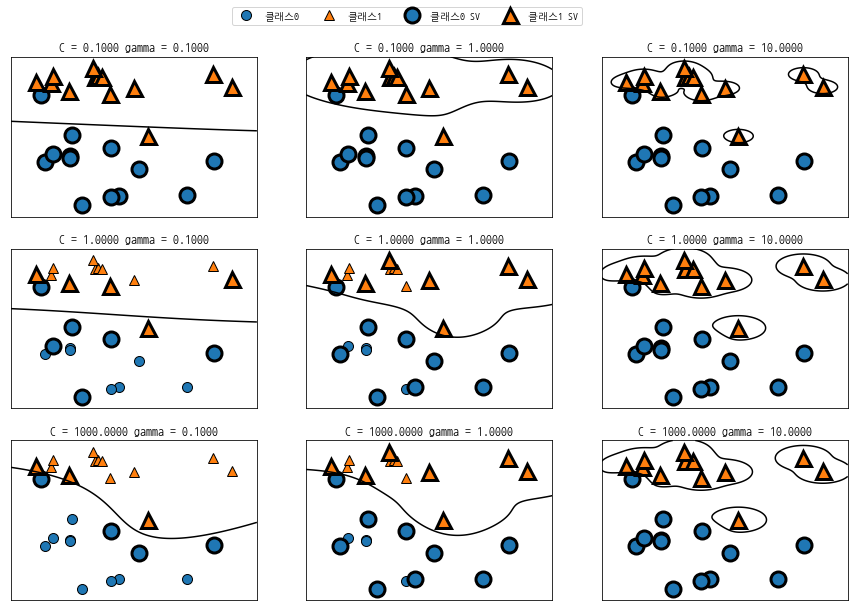

In [21]:
# 매개변수 gamma와 C값의 변경에 따는 변화 보기
# 즉, C와 gamma값에 따라서 결정경계와 서포트벡터가 결정된다.
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0,0].legend(["클래스0","클래스1","클래스0 SV","클래스1 SV"], ncol=4, loc=(.9, 1.2))
plt.show()

# 결과분석
# gamma값을 0.1, 1.0, 10.0으로 증가 : 작은 값은 경계를 간단히 변경, 반대는 더 복잡한 모델을 
# 생성
# C값을 0.1, 1.0, 1000으로 증가 : C값의 증가에 따라 포인트들이 모델에 큰 영향을 주며 결정
# 경계를 휘어서 정확하게 분류한다.

#### SVM을 위한 데이터 전처리

데이터특성들의 값에 따라 그 값들의 범위(단위)가 완전히 다를 경우에 이 것이 커널SVM에서는 영향이 아주 크게 된다. 이 문제를 해결하기 위해서는 특성값들의 범위가 비슷해지도록 조정하는 것이다. `커널SVM에서는 0~1사이의 값으로 전처리`하게 된다.

##### 실습 1. 유방암데이터셋

In [22]:
# RBF커널 SVM을 유방암데이터셋에 적용
from sklearn import datasets
cancer = datasets.load_breast_cancer()
print("cancer.key(): {}".format(cancer.keys()))
print("cancer 데이터형태: {}".format(cancer.data.shape)) # (569, 30)
print() 
# 악성 212, 양성 357
print("클래스별 샘플 갯수 :{}".format(\
        {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print() 
print("특성이름 :{}".format(cancer.feature_names))

cancer.key(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
cancer 데이터형태: (569, 30)

클래스별 샘플 갯수 :{'malignant': 212, 'benign': 357}

특성이름 :['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
# 1. SVM으로 기계학습
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
   train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC().fit(X_train, y_train)
print('훈련세트점수: {:.3f}'.format(svc.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(svc.score(X_test, y_test)))

훈련세트점수: 0.904
검증세트점수: 0.937


In [25]:
# 2. RandomForest로 기계학습
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
print('훈련세트점수: {:.3f}'.format(forest.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(forest.score(X_test, y_test)))

훈련세트점수: 1.000
검증세트점수: 0.972


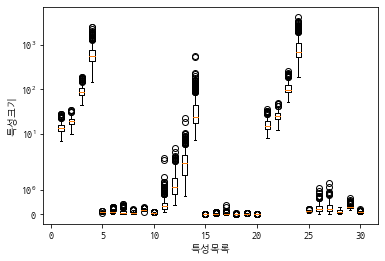

In [26]:
# 과적합화를 개선하기 위한 작업
# 특성값의 범위를 표준화 시키기
plt.boxplot(X_train, manage_ticks=False)

# y축 스케일지정 (linear, log, symlog, logit)
plt.yscale('symlog') # 표준화
plt.xlabel("특성목록")
plt.ylabel("특성크기")
plt.show()

###### 각 특성치의 값들을 표준화처리하기

In [27]:
# 1. 학습용데이터셋 표준화
# 특성마다 서로 다른 단위문제를 해결하기 위해 데이터전처리 즉, 0~1사이의 값으로 표준화
# MinMax(Normalization) 표준화방법 : (x - 최소값) / (최대값 - 최소값)

# 학습용 데이터셋에서 특성별로 최소값계산
min_on_training = X_train.min(axis=0)
# 특성별로 (최대값 - 최소값)의 범위를 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 학습용데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해서 최소값 0, 최대값은 1로 표준화가 됨
X_train_scaled = (X_train - min_on_training) / range_on_training
# print(X_train_scaled[:5])

print('특성별 최소값: {}'.format(X_train_scaled.min(axis=0)))
print('특성별 최대값: {}'.format(X_train_scaled.max(axis=0)))

특성별 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


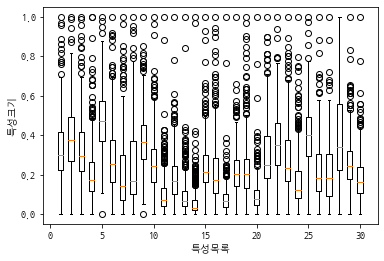

In [28]:
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.xlabel("특성목록")
plt.ylabel("특성크기")
plt.show()

In [29]:
# 2. 검증용데이터셋 표준화
X_test_scaled = (X_test - min_on_training) / range_on_training

# 표준화된 데이터셋으로 다시 학습을 실시
svc = SVC().fit(X_train_scaled, y_train)
print('훈련세트점수: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('검증세트점수: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

# 결과분석
# 표준화전 훈련세트점수: 0.904 / 검증세트점수: 0.937
# 표준화후 훈련세트점수: 0.984 / 검증세트점수: 0.972

훈련세트점수: 0.984
검증세트점수: 0.972


In [30]:
# SVM의 매개변수(C, gamma)값을 증가시켜 더 복잡한 모델 만들기
svc = SVC(C=1000).fit(X_train_scaled, y_train)
print('훈련세트점수: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('검증세트점수: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련세트점수: 1.000
검증세트점수: 0.958


##### 실습 2. 붓꽃데이터셋

In [31]:
# load_iris(), 독립변수 꽃잎의길이와 넓이만 선택(특성)
# SVM을 적용
iris = datasets.load_iris()
# 2,3열만 선택
X = iris.data[:,[2,3]] # 독립변수 꽃잎의길이와 넓이
y = iris.target # 종속변수 : 품종
print(X[:5])
print(y[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0]


In [32]:
# 데이터셋분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# SVM 기계학습
svc = SVC(C=0.1).fit(X_train, y_train)
print('훈련세트점수: {:.3f}'.format(svc.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(svc.score(X_test, y_test)))

훈련세트점수: 0.952
검증세트점수: 0.978


##### 실습 3. 비만지수분류

In [34]:
import random

# BMI를 계산해서 레이블(정답)을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return 'thin'
    if bmi < 25: return 'normal'
    return 'fat'

# 출력파일준비
f = open('../data/ml/bmi/bmi.csv', 'w', encoding='utf-8')
f.write('height,weight,label\n') # 주의: 공백없이 작성할 것. 공백이 있으면 공백포함 필드명이 됨

# 출력파일생성(무작위로 데이터생성)
cnt = {'thin':0, 'normal':0, 'fat':0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h,w)
    cnt[label] += 1
    f.write('{0},{1},{2}\n'.format(h,w,label)) # 공백없이 작성
f.close()
print(cnt, '건의 데이터가 생성되었습니다!')

{'thin': 6404, 'normal': 5938, 'fat': 7658} 건의 데이터가 생성되었습니다!


In [35]:
# SVM으로 학습하기
from sklearn import svm, metrics

# 데이터로딩
tbl = pd.read_csv('../data/ml/bmi/bmi.csv')

# tbl.tail()
label = tbl['label']

# 독립변수의 표준화
w = tbl['weight'] / 100 # 최대가 100kg이라고 가정
h = tbl['height'] / 200 # 최대가 200cm로 가정

# 정규화된 데이터(0~1 사이의 값)
wh = pd.concat([w,h], axis=1) # 열합치기
wh.head()

,weight,height
0,0.51,0.995
1,0.60,0.865
2,0.61,0.825
3,0.68,0.870
4,0.59,0.655


In [36]:
# 학습용:검증용 = 75:25로 분리
X_train, X_test, y_train, y_test = train_test_split(wh, label)

# 데이터학습
clf = svm.SVC().fit(X_train, y_train)

# 데이터예측
predict = clf.predict(X_test)

# 결과출력
print('훈련세트점수: {:.3f}'.format(clf.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(clf.score(X_test, y_test)))
print()

cl_report = metrics.classification_report(y_test, predict)
print('결과보고서 :', cl_report)

# 결과분석
# 2만개자료로 99.6%로 분석하는 데 성공
# 랜덤으로 자료를 생성했기 때문에 정밀도는 의미가 없다.

훈련세트점수: 0.995
검증세트점수: 0.995

결과보고서 :               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1916
      normal       0.99      0.99      0.99      1466
        thin       1.00      0.99      0.99      1618

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



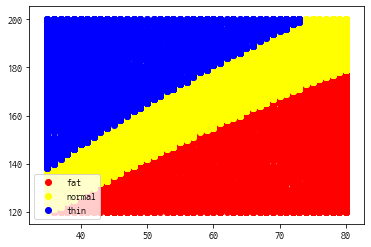

In [37]:
# bmi결과 시각화
tbl = pd.read_csv('../data/ml/bmi/bmi.csv', index_col=2)
tbl.head()

# 그래프객체
fig = plt.figure()

# 서브플로생성
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c=color, label=lbl)
    
scatter('fat', 'red')
scatter('normal', 'yellow')
scatter('thin', 'blue')
ax.legend()
plt.show()

##### 실습 4. Olevetti얼굴이미지 분류

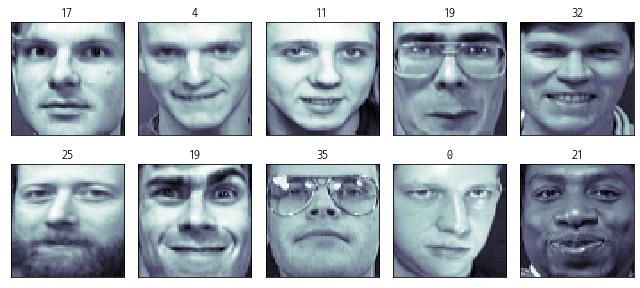

In [38]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])        
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
        
plt.tight_layout()
plt.show()

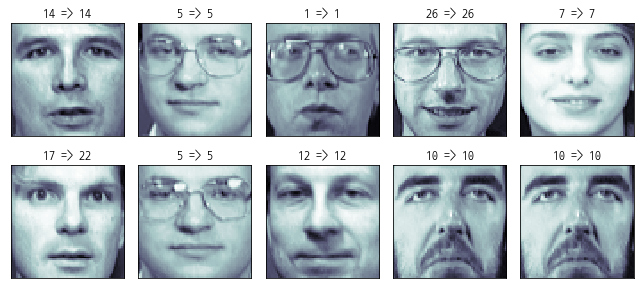

In [40]:
# 학습용:검증용 = 75:25로 분리
X_train, X_test, y_train, y_test =\
    train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)

#svc = SVC(kernel='linear').fit(X_train, y_train)
svc = SVC(kernel='rbf').fit(X_train, y_train)
#svc = SVC(kernel='poly').fit(X_train, y_train)
#svc = SVC(kernel='poly').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(42)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k+1), :].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])        
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))        
plt.tight_layout()
plt.show()

In [41]:
y_pred_train = svc.predict(X_train) 
y_pred_test = svc.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[25  6 31 15 28 34  8 34 15 29  9  8 29  2 36 21 25  4 23 34  9 22 23 23
 37 14  2 25 35 16 15 39  6 24 21 10 31 19 32  1 16 18  3 11 26 10 35 24
 23 11 33 12 28 11 21 13 27 12 19 29 28 13  3 37 16  3 23  9  8  6 16 28
 20 39 23 28 10  4 32 39 22  7 13 38 22 21  2 18 36 27  5 32 35  2  0 21
 15 21 37 22 13 23 21 27 27 30 23  3 20 39  6  2 33  4 24 12  9 11 16 38
 38 34  4  1 28  7 24 39  7  1 36 21 38 38 22 16 10 16  8 18 39 11 25 18
 20 37 11 14 15 15  1 26  7 10 32 20 31 13 23 31 24 30  1 22 30 16 27 12
  7 18 30 37 34 18 35  8 25  1 29  8 26  3 38  5  4 27  5 20 31 31 33 12
 22  6 30 13 18  2  4 15 20 33  9 38 17 22  9 36  9 35 16  6 30  4 20 27
 22 14 14 18 13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4
 10 36 27 35  3  5 34 12 29  2 18 16 15 24 20  3  3 12 18 37 28 36 14 28
 37 17  9 33 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31  8  7  8 29
 24 27 21  0 35 19 25 32 19 11  4 17]
[13 30 34 19 24  6 15 26 14 21  3 13 11 39  1  5 29 14 20 19 22 26 12 39
 17 31 39  1 

In [42]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         5
          15       0.88      1.00      0.93         7
          16       0.91      1.00      0.95        10
          17       1.00    

In [43]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         0
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.60      1.00      0.75         3
          17       1.00      0.50      0.67         6
          19       1.00    